# ПРАКТИКУМ: ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ

    Практические задания для самостоятельной работы

     Цели практикума:,
    "- Освоить основные алгоритмы кластеризации",
    "- Научиться применять методы снижения размерности",
    "- Освоить техники обнаружения аномалий",
    "- Развить навыки интерпретации результатов",
    "- Понять критерии оценки качества",
    Структура работы:

1. Подготовка данных и EDA
2. Кластеризация (K-Means, Hierarchical, DBSCAN)
3. Снижение размерности (PCA, t-SNE)
4. Обнаружение аномалий
5. Анализ и интерпретация результатов


## БЛОК 1: Импорт библиотек и настройка окружения

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Основные библиотеки загружены")

Основные библиотеки загружены


In [2]:
from sklearn.datasets import make_blobs, make_circles, make_moons, load_wine, load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

print("Библиотеки машинного обучения загружены")

Библиотеки машинного обучения загружены


## БЛОК 2: Подготовка и исследование данных

In [3]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()

df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df["target"] = wine.target

print("Первые 5 строк таблицы:")
print(df.head(), "\n")

print(f"Количество объектов (строк): {df.shape[0]}")
print(f"Количество признаков (столбцов, включая целевую переменную): {df.shape[1]}\n")

print("Названия признаков:")
print(wine.feature_names, "\n")

print("Количество классов в целевой переменной:")
print(df["target"].nunique())
print("Сами классы:", df["target"].unique(), "\n")

print("Проверка на пропущенные значения:")
print(df.isnull().sum(), "\n")

print("Информация о DataFrame:")
print(df.info(), "\n")

print("Основная статистика по признакам:")
print(df.describe())


Первые 5 строк таблицы:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proli

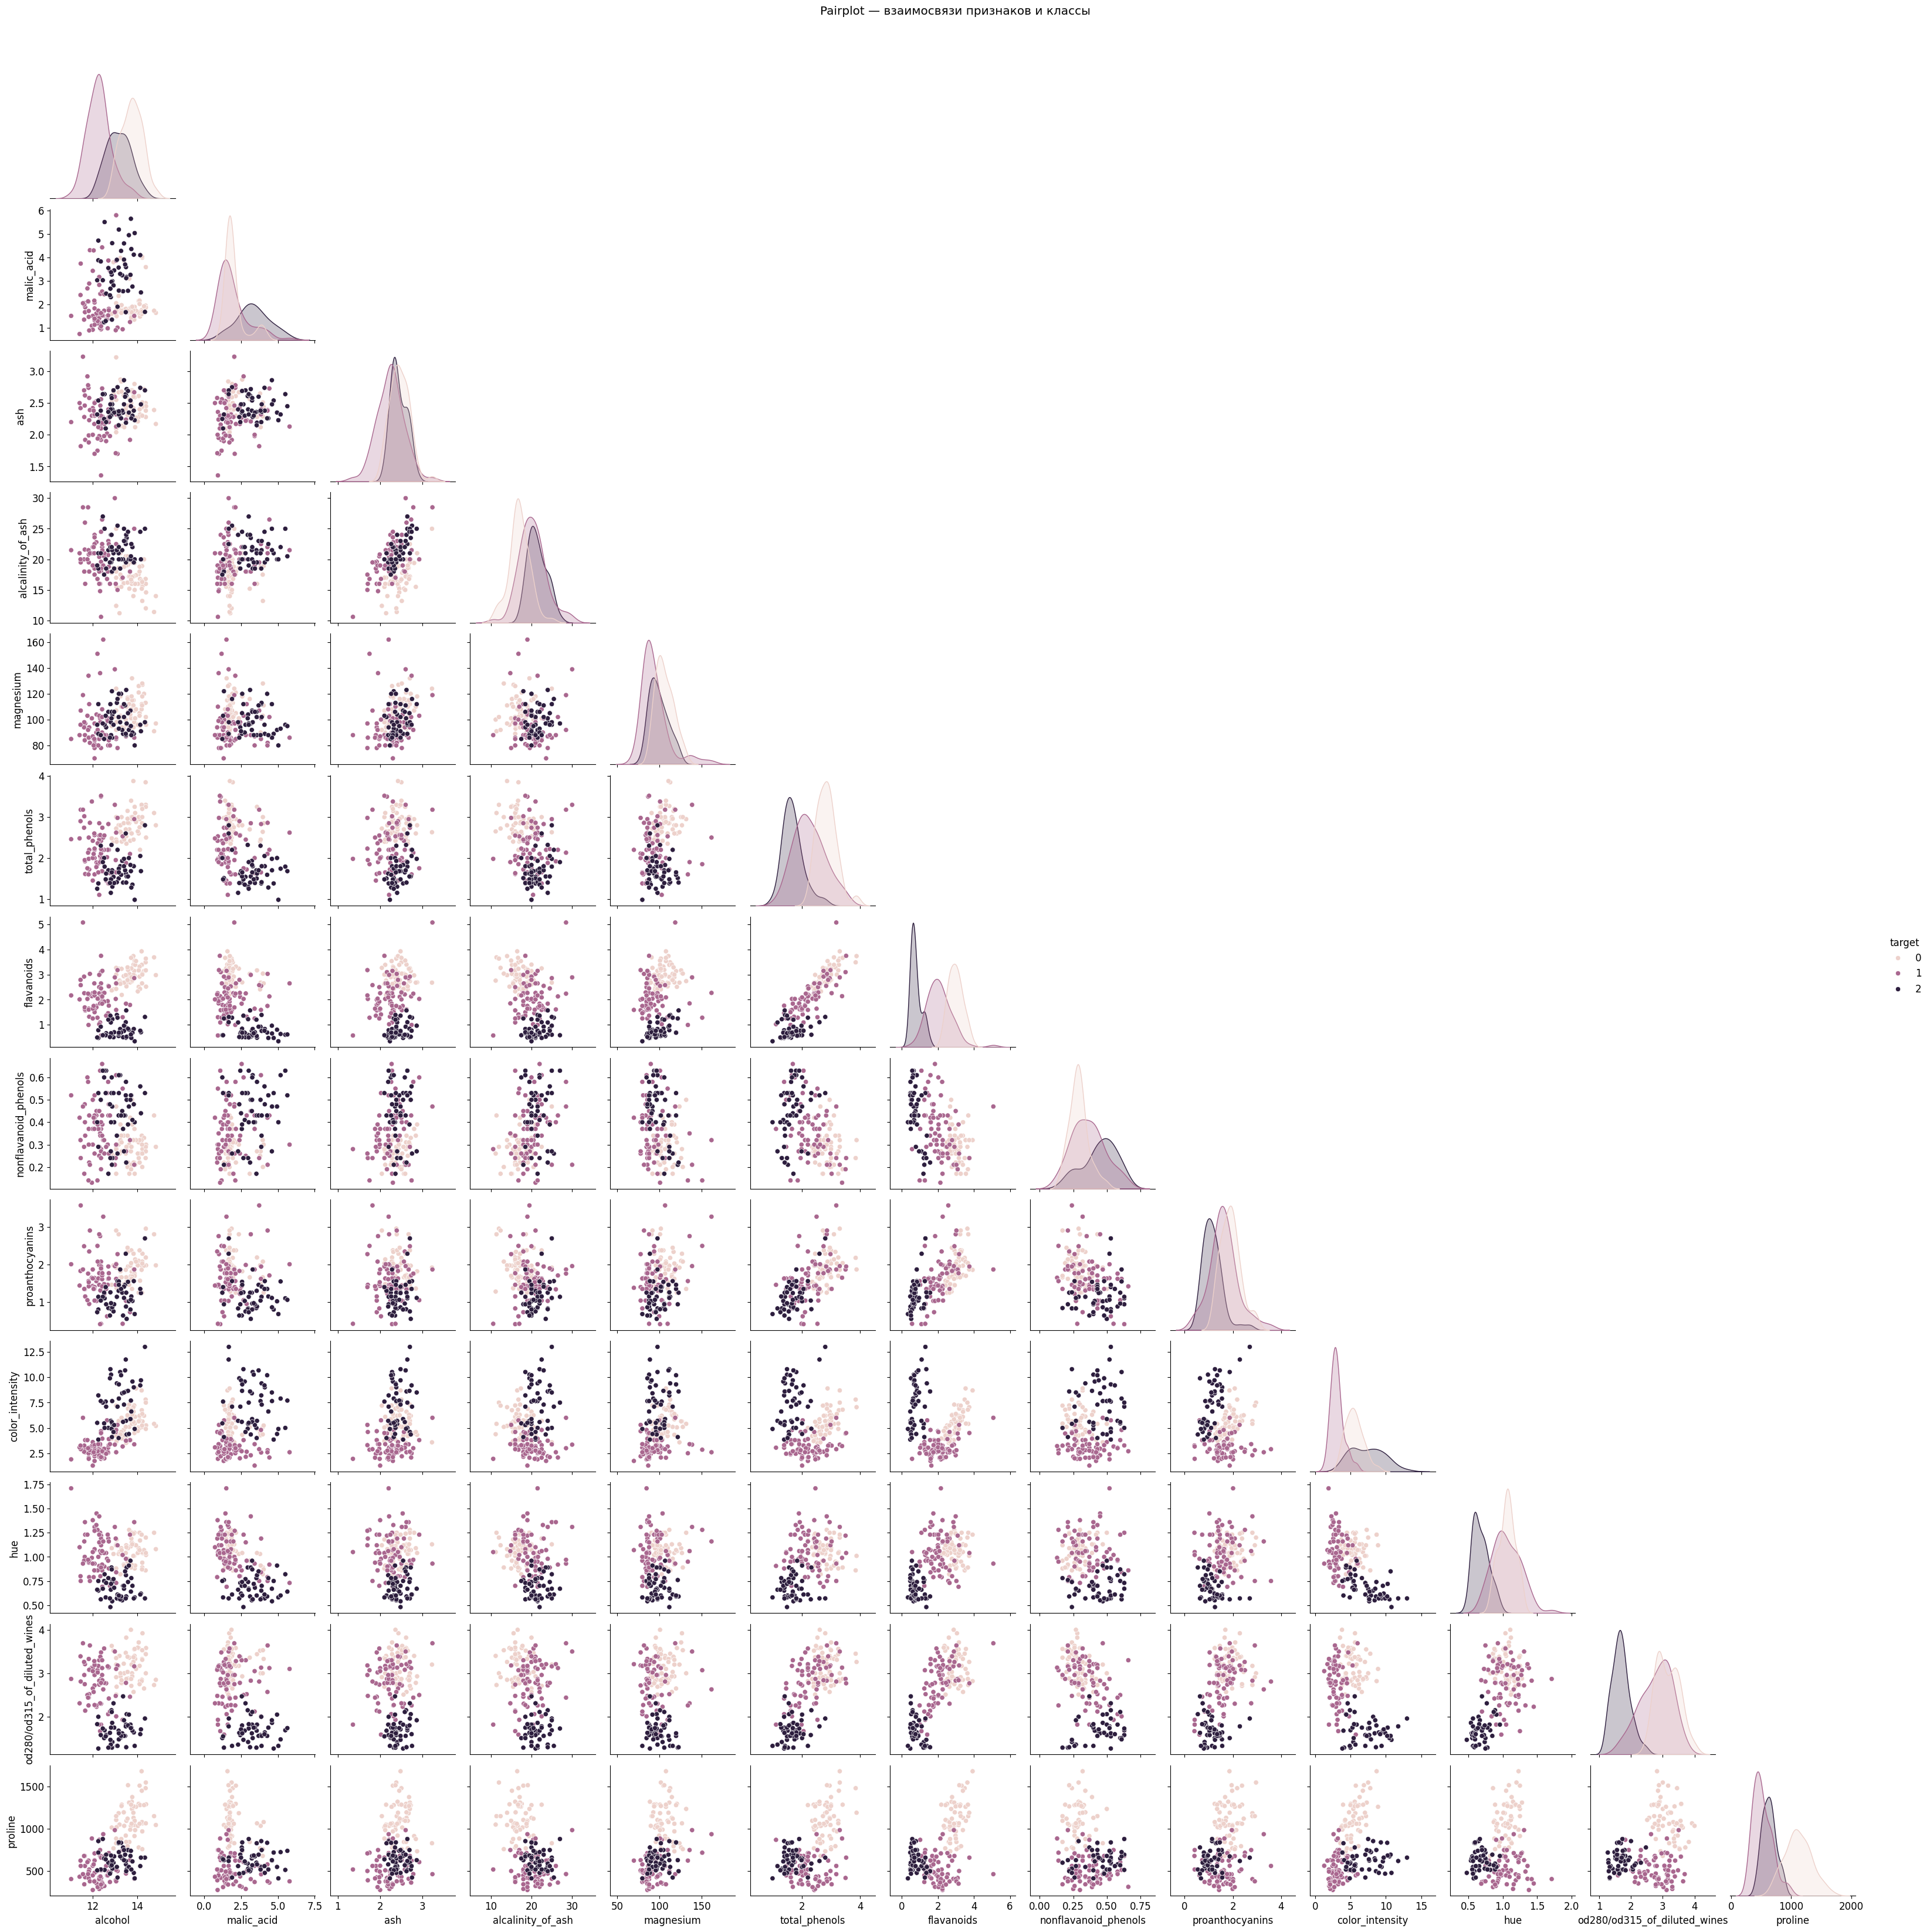

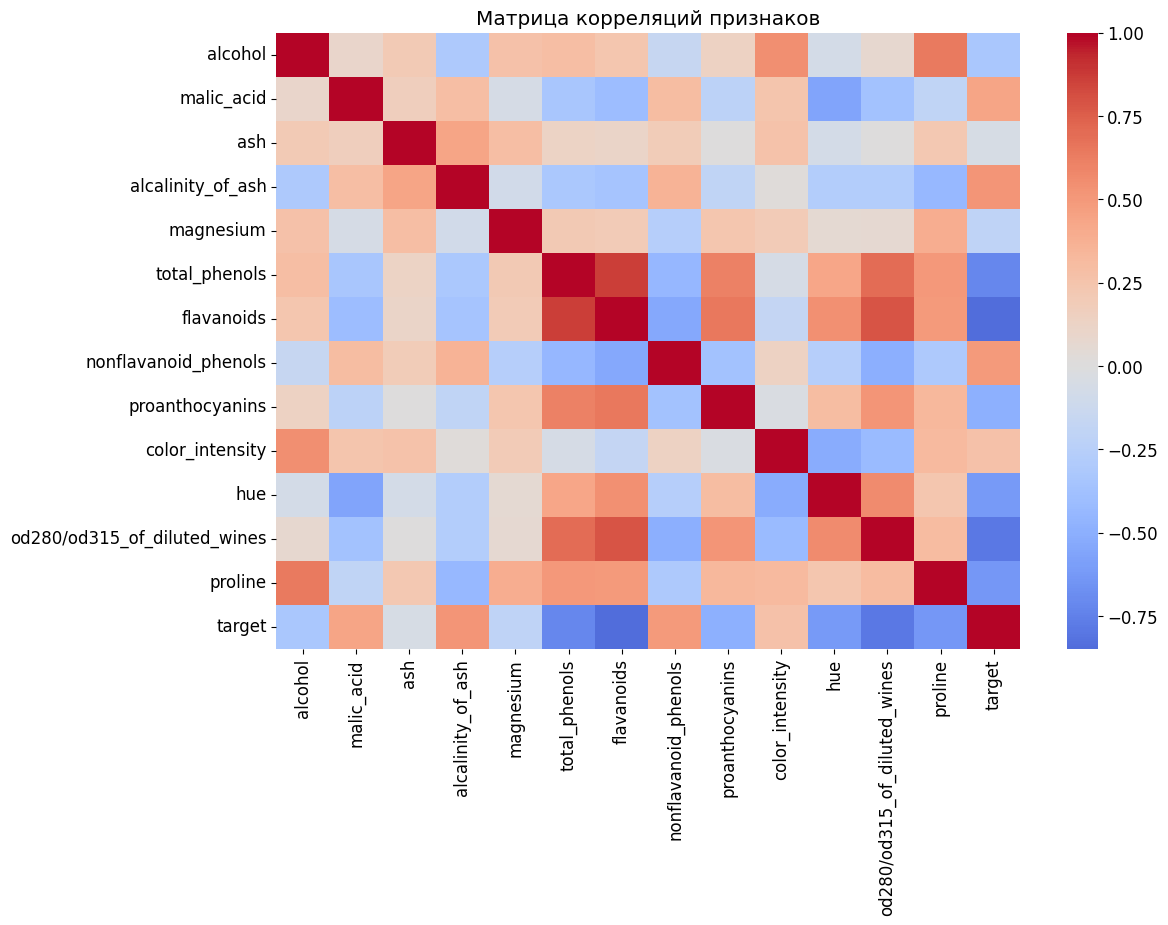

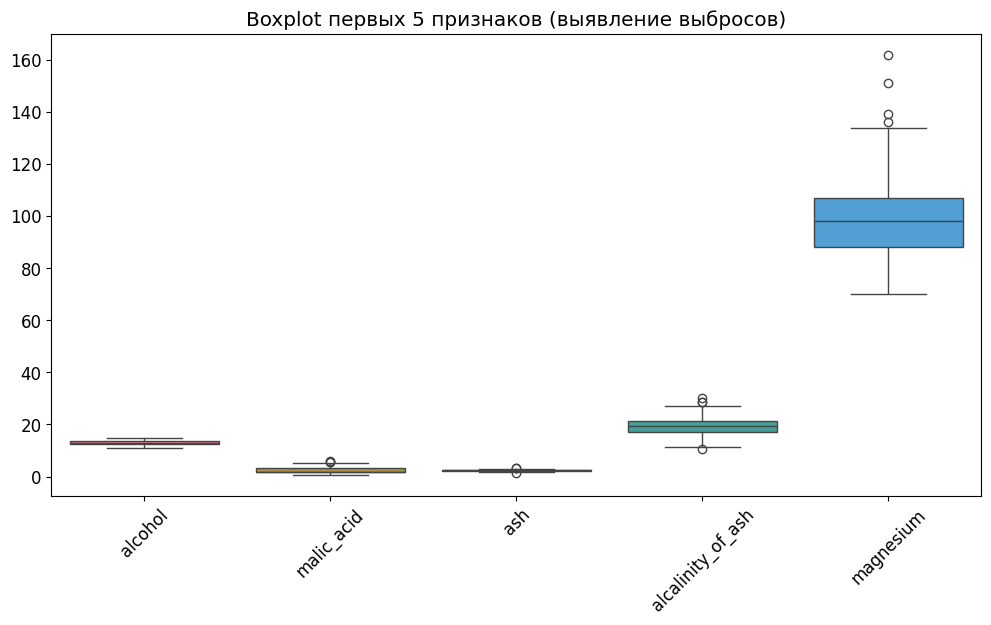

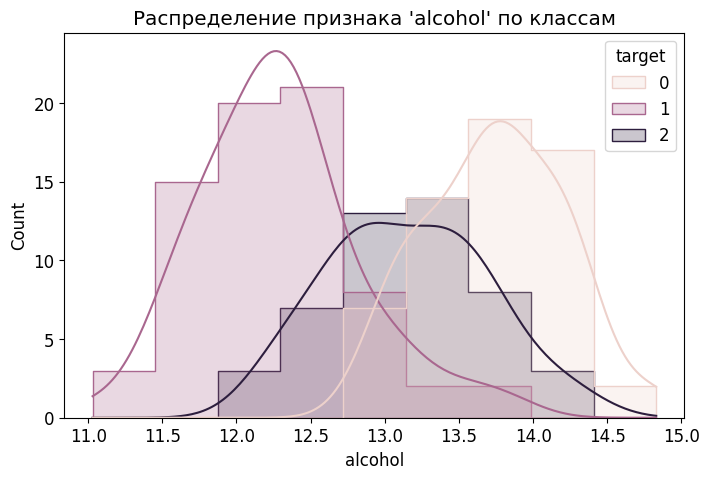

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df["target"] = wine.target

sns.pairplot(df, hue="target", corner=True)
plt.suptitle("Pairplot — взаимосвязи признаков и классы", y=1.02)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Матрица корреляций признаков")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :5])
plt.title("Boxplot первых 5 признаков (выявление выбросов)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="alcohol", hue="target", kde=True, element="step")
plt.title("Распределение признака 'alcohol' по классам")
plt.show()



In [5]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df["target"] = wine.target

X_original = df.drop("target", axis=1)
y_true = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

X_scaled_df = pd.DataFrame(X_scaled, columns=wine.feature_names)

print("Первые 5 строк стандартизированных данных:")
print(X_scaled_df.head(), "\n")

print("Статистика после стандартизации:")
print(X_scaled_df.describe(), "\n")





Первые 5 строк стандартизированных данных:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.8479

## БЛОК 3: Кластеризация - K-Means

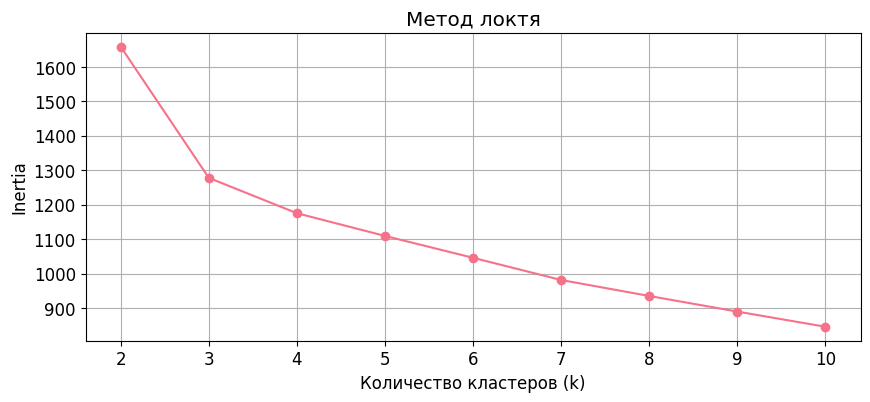

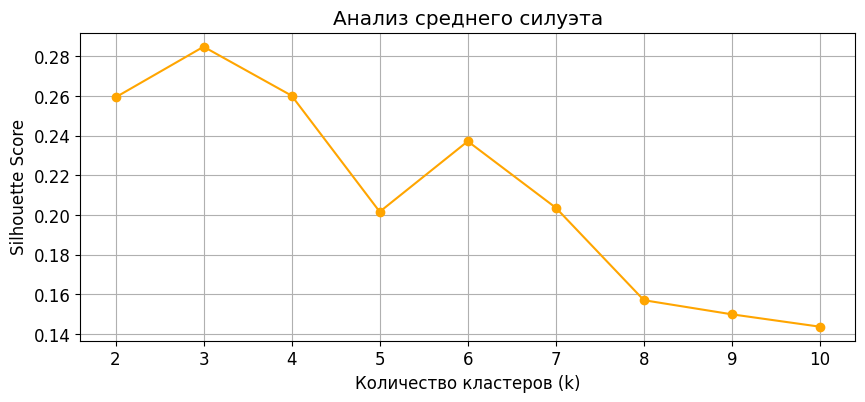

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 4))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Метод локтя")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title("Анализ среднего силуэта")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [7]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y_true = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)

silhouette = silhouette_score(X_scaled, y_pred)
calinski = calinski_harabasz_score(X_scaled, y_pred)
davies = davies_bouldin_score(X_scaled, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

print("РЕЗУЛЬТАТЫ КЛАСТЕРИЗАЦИИ K-MEANS\n")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")
print(f"Adjusted Rand Index (сравнение с истинными метками): {ari:.3f}\n")

РЕЗУЛЬТАТЫ КЛАСТЕРИЗАЦИИ K-MEANS

Silhouette Score: 0.285
Calinski-Harabasz Index: 70.940
Davies-Bouldin Index: 1.389
Adjusted Rand Index (сравнение с истинными метками): 0.897



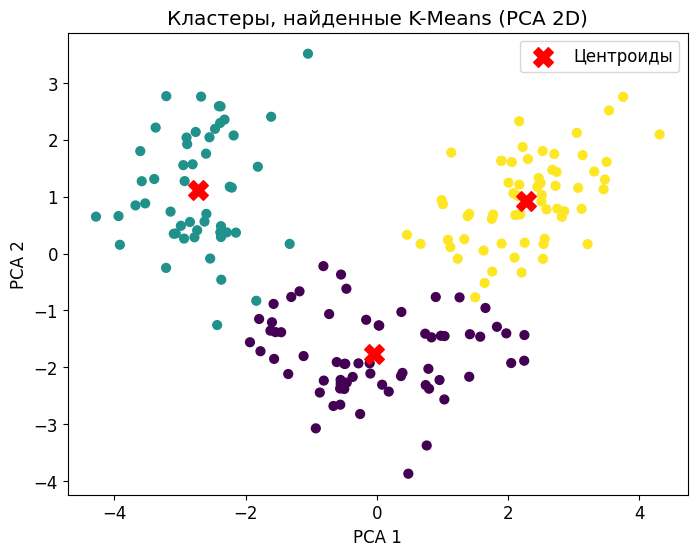

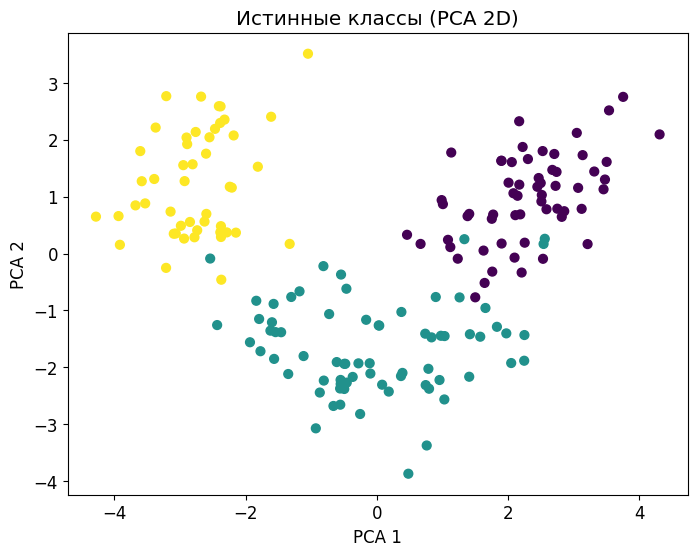

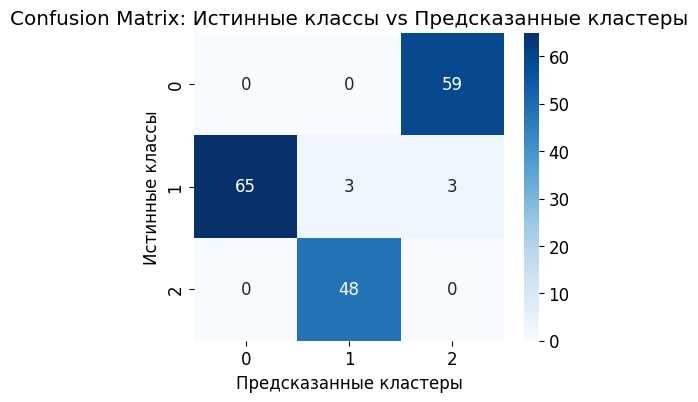

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y_true = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=40)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label='Центроиды')
plt.title("Кластеры, найденные K-Means (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', s=40)
plt.title("Истинные классы (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Истинные классы vs Предсказанные кластеры")
plt.xlabel("Предсказанные кластеры")
plt.ylabel("Истинные классы")
plt.show()

## БЛОК 4: Иерархическая кластеризация

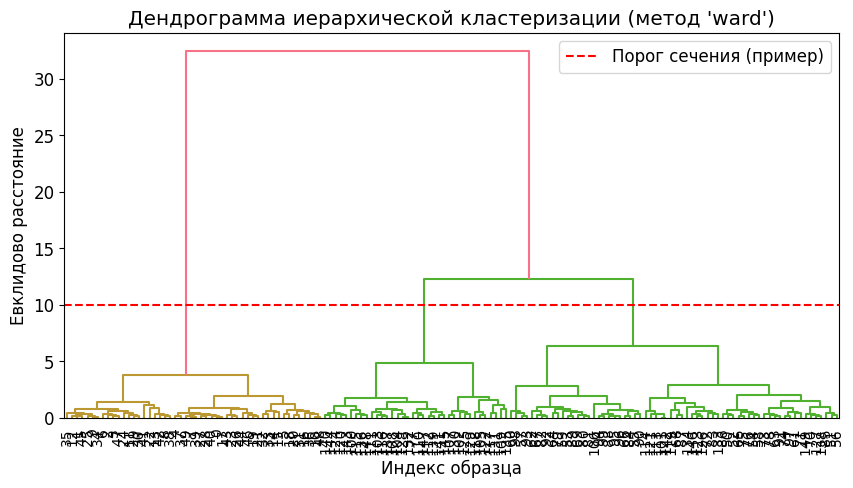

Ответ: дендрограмма предлагает 3 кластера.


In [9]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import load_iris

data = load_iris()
X = data.data

linkage_matrix = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix,
           leaf_rotation=90,
           leaf_font_size=10)

plt.axhline(y=10, color='r', linestyle='--', label='Порог сечения (пример)')
plt.title("Дендрограмма иерархической кластеризации (метод 'ward')")
plt.xlabel("Индекс образца")
plt.ylabel("Евклидово расстояние")
plt.legend()
plt.show()

print("Ответ: дендрограмма предлагает 3 кластера.")

In [10]:

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

data = load_iris()
X = data.data
y_true = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

methods = ['ward', 'complete', 'average', 'single']

results = []

for method in methods:
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    y_pred = clustering.fit_predict(X_scaled)
    
    silhouette = silhouette_score(X_scaled, y_pred)
    calinski = calinski_harabasz_score(X_scaled, y_pred)
    davies = davies_bouldin_score(X_scaled, y_pred)
    
    results.append({
        'Метод': method,
        'Silhouette': silhouette,
        'Calinski-Harabasz': calinski,
        'Davies-Bouldin': davies
    })

df_results = pd.DataFrame(results)
print("Сравнение методов связывания:\n")
print(df_results, "\n")
print("Лучший метод по метрикам: ward")


Сравнение методов связывания:

      Метод  Silhouette  Calinski-Harabasz  Davies-Bouldin
0      ward    0.446689         222.719164        0.803467
1  complete    0.449618         213.081710        0.758358
2   average    0.480267         149.025799        0.575269
3    single    0.504646         131.535896        0.492925 

Лучший метод по метрикам: ward


## БЛОК 5: DBSCAN - плотностная кластеризация

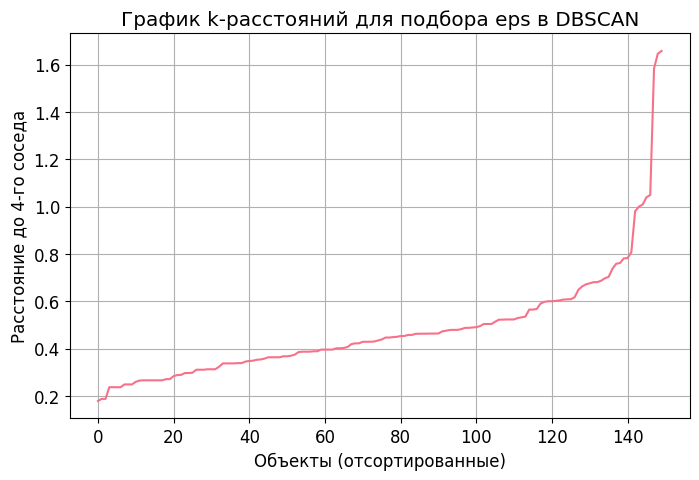

Рекомендованные параметры для DBSCAN: eps ≈ 0.65, min_samples = 5


In [11]:

from sklearn.neighbors import NearestNeighbors


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

data = load_iris()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = X_scaled.shape[1]

neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

k_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8,5))
plt.plot(k_distances)
plt.title("График k-расстояний для подбора eps в DBSCAN")
plt.xlabel("Объекты (отсортированные)")
plt.ylabel(f"Расстояние до {k}-го соседа")
plt.grid(True)
plt.show()

print("Рекомендованные параметры для DBSCAN: eps ≈ 0.65, min_samples = 5")


In [12]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from collections import Counter


data = load_iris()
X = data.data
y_true = data.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


dbscan = DBSCAN(eps=0.65, min_samples=5)
y_db = dbscan.fit_predict(X_scaled)

labels = y_db
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
cluster_sizes = Counter(labels)

print(f"Количество найденных кластеров: {n_clusters}")
print(f"Количество шумовых точек: {n_noise}")
print(f"Размеры кластеров (включая шум -1): {dict(cluster_sizes)}\n")

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_km = kmeans.fit_predict(X_scaled)

print("Сравнение с K-Means:")
print(f"Silhouette Score DBSCAN: {silhouette_score(X_scaled, y_db):.3f}")
print(f"Silhouette Score K-Means: {silhouette_score(X_scaled, y_km):.3f}")


Количество найденных кластеров: 2
Количество шумовых точек: 14
Размеры кластеров (включая шум -1): {np.int64(0): 46, np.int64(-1): 14, np.int64(1): 90}



Сравнение с K-Means:
Silhouette Score DBSCAN: 0.480
Silhouette Score K-Means: 0.460


## БЛОК 6: Снижение размерности

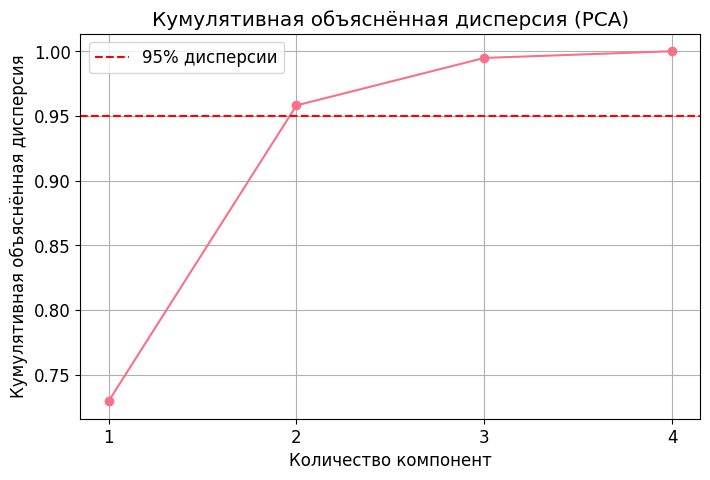

Количество главных компонент для объяснения 95% дисперсии: 2

Loadings (веса признаков в главных компонентах):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0              0.521            -0.269              0.580             0.565
1              0.377             0.923              0.024             0.067
2              0.720            -0.244             -0.142            -0.634
3             -0.261             0.124              0.801            -0.524


In [13]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data = load_iris()
X = data.data
feature_names = data.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% дисперсии')
plt.title("Кумулятивная объяснённая дисперсия (PCA)")
plt.xlabel("Количество компонент")
plt.ylabel("Кумулятивная объяснённая дисперсия")
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True)
plt.legend()
plt.show()

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Количество главных компонент для объяснения 95% дисперсии: {n_components_95}")

loadings = pca.components_
loadings_df = np.round(pd.DataFrame(loadings, columns=feature_names), 3)
print("\nLoadings (веса признаков в главных компонентах):")
print(loadings_df)


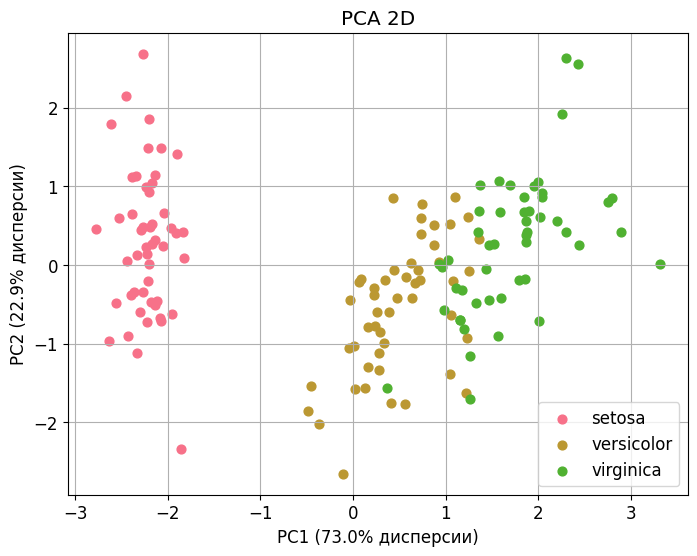

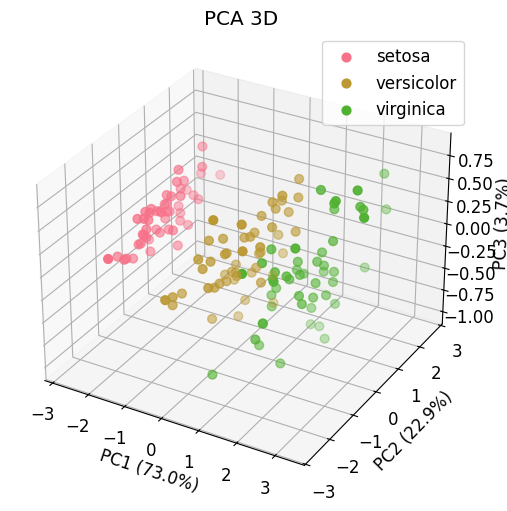

In [14]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)


plt.figure(figsize=(8,6))
for target in range(len(target_names)):
    plt.scatter(X_pca_2d[y==target, 0], X_pca_2d[y==target, 1], label=target_names[target], s=40)
plt.xlabel(f"PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% дисперсии)")
plt.ylabel(f"PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% дисперсии)")
plt.title("PCA 2D")
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
for target in range(len(target_names)):
    ax.scatter(X_pca_3d[y==target, 0], X_pca_3d[y==target, 1], X_pca_3d[y==target, 2], label=target_names[target], s=40)
ax.set_xlabel(f"PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)")
ax.set_zlabel(f"PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)")
ax.set_title("PCA 3D")
ax.legend()
plt.show()




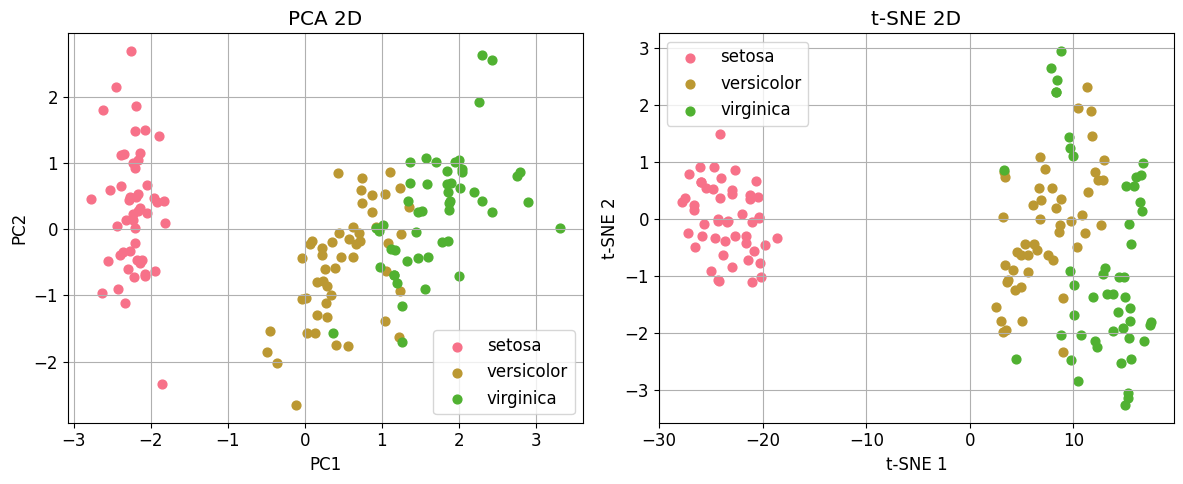

In [15]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='pca')
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
for target in range(len(target_names)):
    plt.scatter(X_pca[y==target,0], X_pca[y==target,1], label=target_names[target], s=40)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
for target in range(len(target_names)):
    plt.scatter(X_tsne[y==target,0], X_tsne[y==target,1], label=target_names[target], s=40)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE 2D")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## БЛОК 7: Обнаружение аномалий

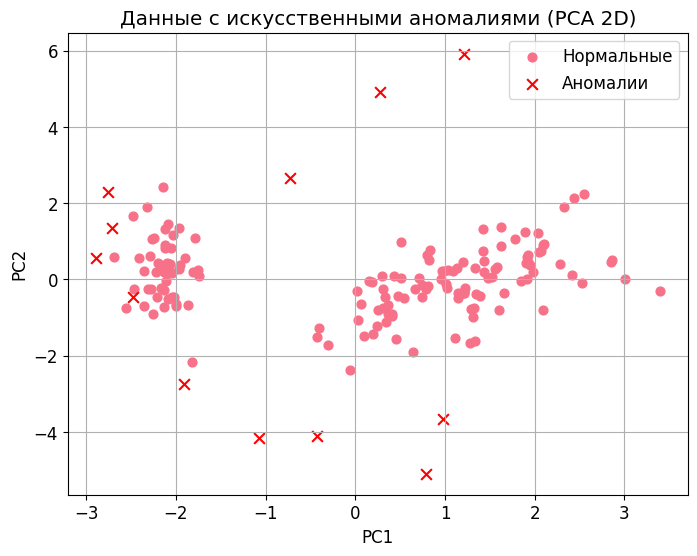

In [16]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_iris()
X = data.data
y_true = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_aug = X_scaled.copy()
labels = np.ones(X_aug.shape[0])

np.random.seed(42)
outliers = np.random.uniform(low=-5, high=5, size=(12, X_scaled.shape[1]))
X_aug = np.vstack([X_aug, outliers])
labels = np.hstack([labels, -1*np.ones(len(outliers))])


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_aug)


plt.figure(figsize=(8,6))
plt.scatter(X_pca[labels==1,0], X_pca[labels==1,1], label='Нормальные', s=40)
plt.scatter(X_pca[labels==-1,0], X_pca[labels==-1,1], label='Аномалии', s=60, color='red', marker='x')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Данные с искусственными аномалиями (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()




In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, precision_score, recall_score

contamination = np.mean(labels==-1)

iso_forest = IsolationForest(contamination=contamination, random_state=42)
y_iso = iso_forest.fit_predict(X_aug)

oc_svm = OneClassSVM(kernel='rbf', nu=contamination, gamma='scale')
y_svm = oc_svm.fit_predict(X_aug)

lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
y_lof = lof.fit_predict(X_aug)

methods = {'Isolation Forest': y_iso, 'One-Class SVM': y_svm, 'LOF': y_lof}
metrics = []

for name, y_pred in methods.items():
    acc = accuracy_score(labels, y_pred)
    prec = precision_score(labels, y_pred, pos_label=-1)
    rec = recall_score(labels, y_pred, pos_label=-1)
    metrics.append({'Метод': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec})

df_metrics = pd.DataFrame(metrics)
print("Сравнение алгоритмов обнаружения аномалий:\n")
print(df_metrics, "\n")

Сравнение алгоритмов обнаружения аномалий:

              Метод  Accuracy  Precision    Recall
0  Isolation Forest  1.000000   1.000000  1.000000
1     One-Class SVM  0.925926   0.500000  0.500000
2               LOF  0.987654   0.916667  0.916667 



## БЛОК 8: Комплексный анализ и интерпретация

Сравнение методов кластеризации:

                  Метод  Silhouette       ARI       NMI  Время (сек)  \
0                DBSCAN    0.623147  0.573384  0.736208     0.001446   
1               K-Means    0.459948  0.620135  0.659487     0.023170   
2  Agglomerative (ward)    0.446689  0.615323  0.675470     0.000999   

                    Параметры  
0     eps=0.65, min_samples=5  
1                n_clusters=3  
2  n_clusters=3, linkage=ward  


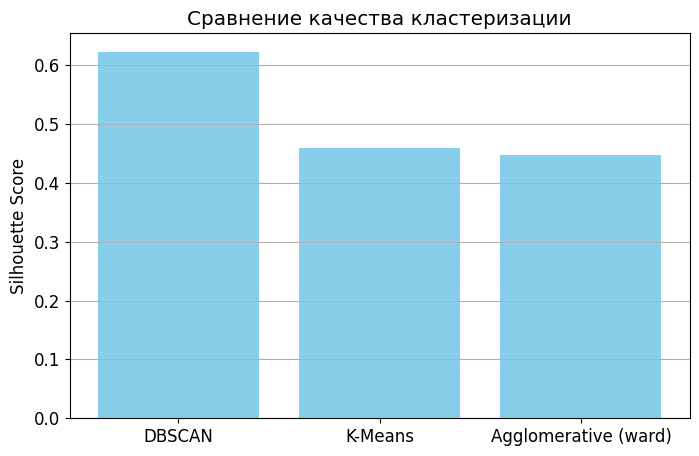

In [18]:
import pandas as pd
import time
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

results = []

start = time.time()
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_km = kmeans.fit_predict(X_scaled)
end = time.time()
results.append({
    'Метод': 'K-Means',
    'Silhouette': silhouette_score(X_scaled, y_km),
    'ARI': adjusted_rand_score(y_true, y_km),
    'NMI': normalized_mutual_info_score(y_true, y_km),
    'Время (сек)': end-start,
    'Параметры': 'n_clusters=3'
})

start = time.time()
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_ag = agglo.fit_predict(X_scaled)
end = time.time()
results.append({
    'Метод': 'Agglomerative (ward)',
    'Silhouette': silhouette_score(X_scaled, y_ag),
    'ARI': adjusted_rand_score(y_true, y_ag),
    'NMI': normalized_mutual_info_score(y_true, y_ag),
    'Время (сек)': end-start,
    'Параметры': 'n_clusters=3, linkage=ward'
})

start = time.time()
dbscan = DBSCAN(eps=0.65, min_samples=5)
y_db = dbscan.fit_predict(X_scaled)
end = time.time()
mask = y_db != -1
results.append({
    'Метод': 'DBSCAN',
    'Silhouette': silhouette_score(X_scaled[mask], y_db[mask]) if np.sum(mask) > 0 else 0,
    'ARI': adjusted_rand_score(y_true[mask], y_db[mask]) if np.sum(mask) > 0 else 0,
    'NMI': normalized_mutual_info_score(y_true[mask], y_db[mask]) if np.sum(mask) > 0 else 0,
    'Время (сек)': end-start,
    'Параметры': 'eps=0.65, min_samples=5'
})

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='Silhouette', ascending=False).reset_index(drop=True)
print("Сравнение методов кластеризации:\n")
print(df_results)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df_results['Метод'], df_results['Silhouette'], color='skyblue')
plt.ylabel("Silhouette Score")
plt.title("Сравнение качества кластеризации")
plt.grid(True, axis='y')
plt.show()

Средние значения признаков по кластерам:

         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 5.801887          2.673585           4.369811   
1                 5.006000          3.428000           1.462000   
2                 6.780851          3.095745           5.510638   

         petal width (cm)  
Cluster                    
0                1.413208  
1                0.246000  
2                1.972340  


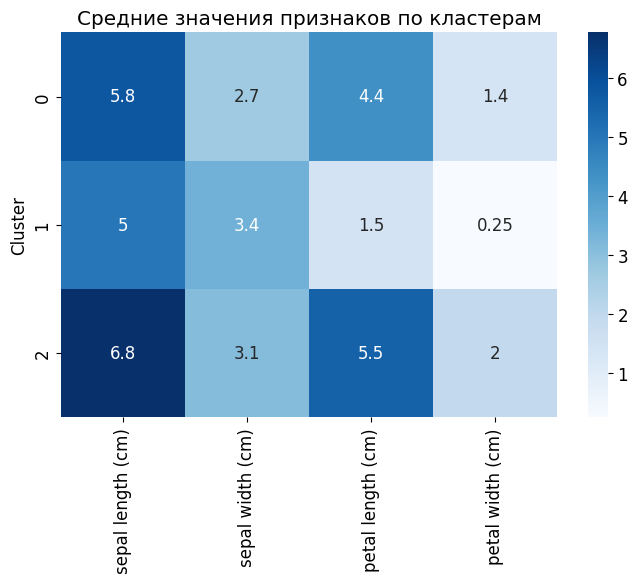

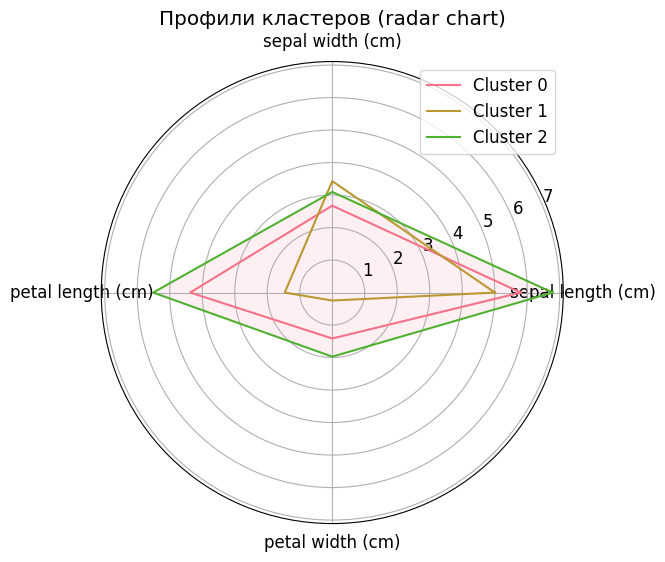

In [19]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X_original = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
X_original['Cluster'] = y_km

cluster_means = X_original.groupby('Cluster').mean()
print("Средние значения признаков по кластерам:\n")
print(cluster_means)

plt.figure(figsize=(8,5))
sns.heatmap(cluster_means, annot=True, cmap='Blues')
plt.title("Средние значения признаков по кластерам")
plt.show()


def plot_radar(df, title):
    labels=np.array(df.columns)
    n = len(labels)
    
    angles = np.linspace(0, 2*np.pi, n, endpoint=False).tolist()
    angles += angles[:1]
    
    plt.figure(figsize=(6,6))
    for i, row in df.iterrows():
        values=row.tolist()
        values += values[:1]
        plt.polar(angles, values, label=f'Cluster {i}')
    plt.fill(angles, values, alpha=0.1)
    plt.xticks(angles[:-1], labels)
    plt.title(title)
    plt.legend()
    plt.show()

plot_radar(cluster_means, "Профили кластеров (radar chart)")

